# 인공지능
## 1. Python_Data_Analytics_and_Visualization

### C. Data Preprocessing

#### I. Missing Value

##### 1) 실습용 'titanic' 데이터셋

In [1]:
import seaborn as sns
TD = sns.load_dataset('titanic')

In [2]:
TD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


##### 2) 결측치 확인

In [3]:
TD.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* .value_counts(dropna = Fasle)
  * 결측치를 포함하여 빈도분석 결과 출력

In [4]:
TD['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

* dropna=False로 하지 않으면 결측치는 제외되고 표시됨.

In [5]:
TD['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [6]:
TD.value_counts(dropna=False)

survived  pclass  sex     age   sibsp  parch  fare      embarked  class  who    adult_male  deck  embark_town  alive  alone
1         1       female  24.0  0      0      69.3000   C         First  woman  False       B     Cherbourg    yes    True     2
0         1       female  2.0   1      2      151.5500  S         First  child  False       C     Southampton  no     False    1
1         1       female  52.0  1      1      93.5000   S         First  woman  False       B     Southampton  yes    False    1
                          53.0  2      0      51.4792   S         First  woman  False       C     Southampton  yes    False    1
                          54.0  1      0      78.2667   C         First  woman  False       D     Cherbourg    yes    False    1
                                                                                                                              ..
                          16.0  0      1      39.4000   S         First  woman  False       D     Sout

* .isnull()
  * 결측치를 'True'로 출력

In [7]:
TD.head().isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


* 각 열(Column)별로 결측치(NaN) 개수 확인
* isnull().sum(axis = 0)
  * axis = 0 : 행기준
  * axis = 1 : 열기준

In [8]:
TD.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* notnull()
  * 결측치를 'False'로 출력

In [9]:
TD.notnull().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


* 결측치 막대 그래프

<Axes: >

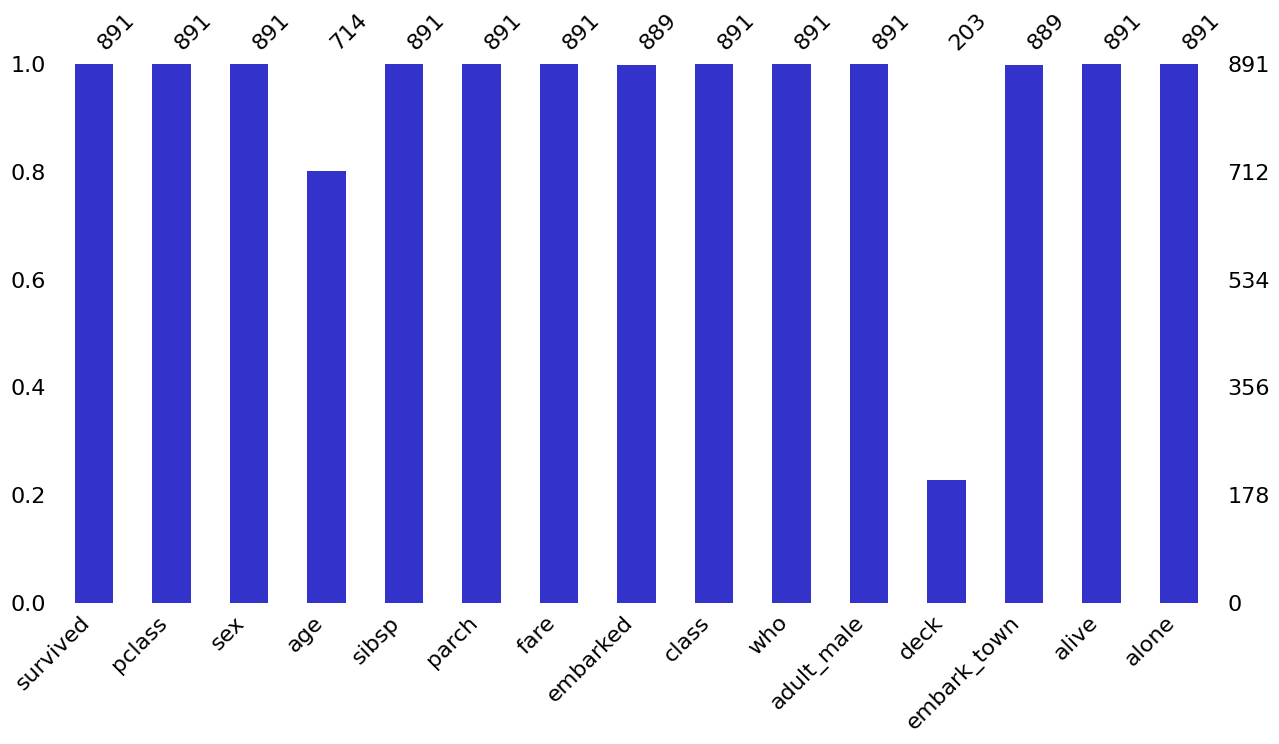

In [11]:
import missingno as msno

msno.bar(TD,
         figsize = (15, 7),
         color = (0.2, 0.2, 0.8))

* 결측치 Matrix

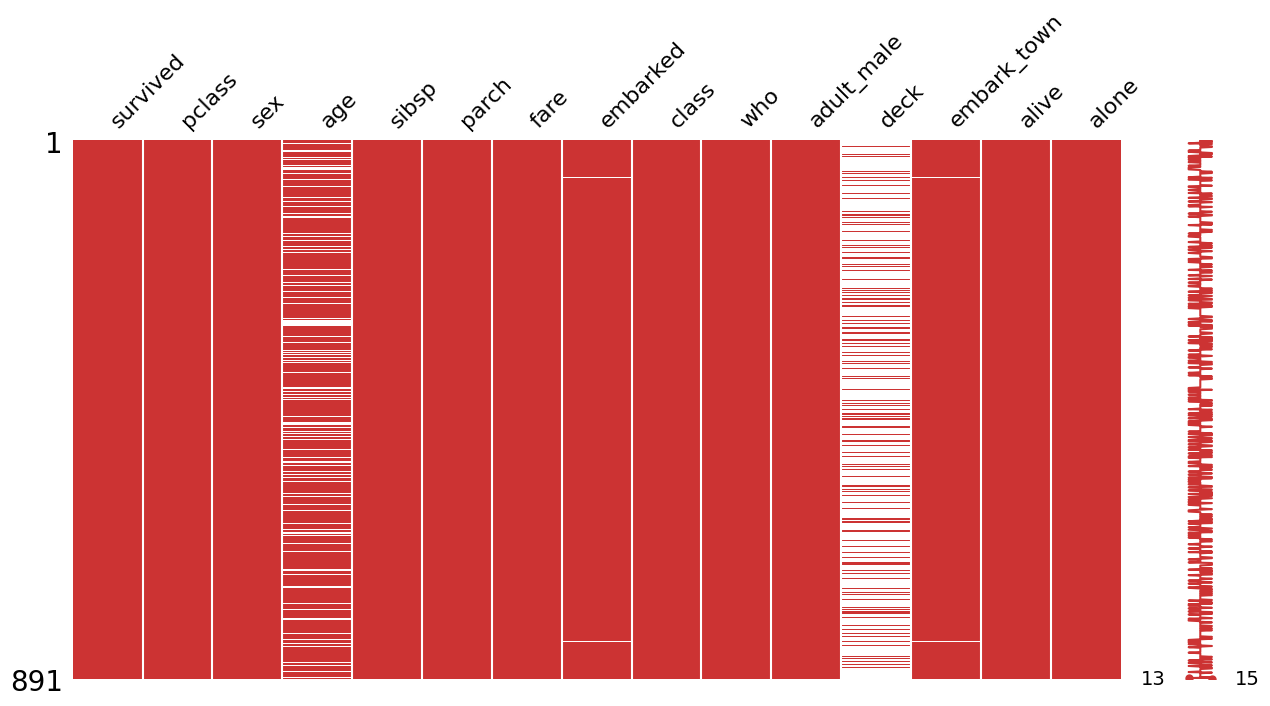

In [13]:
msno.matrix(TD,
            figsize=(15, 7),
            color=(0.8, 0.2, 0.2));

##### 3) 결측치 삭제
* 각 열quffh 측정값(Non-Nan) 개수 확인

In [14]:
TD.notnull().sum(axis=0)

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [16]:
TD.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
TD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


* 300개 이하 측정값(Non-Null)이 있는 열 삭제
  * .dropna(thresh = 300, axis =1)
  * 'deck'열 삭제

In [15]:
TD.dropna(thresh=300, axis=1).shape

(891, 14)

* 'age'행 기준으로 결측치가 있는 행 삭제
  * .dropna(subset = ['age'], how = 'any', axis = 0)
  * how = 'all' : 모든 값이 결측치인 경우 삭제

In [19]:
TD.shape

(891, 15)

* 891 -> 714

In [20]:
TD.dropna(subset=['age'], how='any', axis=0).shape

(714, 15)

* 891 -> 182

In [21]:
TD.dropna(how='all', axis=0).shape

(891, 15)

##### 4) 결측치 치환